In [1]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import Audio_code as ac

%matplotlib inline

In [2]:
### Parameters ###
fft_size = 2048 # window size for the FFT
step_size = fft_size//16 # distance to slide along the window (in time)
spec_thresh = 4 # threshold for spectrograms (lower filters out more noise)
lowcut = 500 # Hz # Low cut for our butter bandpass filter
highcut = 15000 # Hz # High cut for our butter bandpass filter
# For mels
n_mel_freq_components = 64 # number of mel frequency channels
shorten_factor = 10 # how much should we compress the x-axis (time)
start_freq = 300 # Hz # What frequency to start sampling our melS from 
end_freq = 8000 # Hz # What frequency to stop sampling our melS from 

In [3]:
# Grab your wav and filter it
# mywav = 'wavs/have-a-good-weekend.wav'
mywav = 'wavs/hallway-crowd.wav'
# mywav = 'wavs/closetalking.wav'
rate, data = wavfile.read(mywav)

# Convert to mono:
data = data.sum(axis=1) / 2

data = ac.butter_bandpass_filter(data, lowcut, highcut, rate, order=1)
# Only use a short clip for our demo
if np.shape(data)[0]/float(rate) > 5:
    data = data[0:rate*5] 


print('Length in time (s): ', np.shape(data)[0]/float(rate))

Length in time (s):  5.0


In [4]:
# Play the audio
import IPython
IPython.display.Audio(data=data, rate=rate)

In [5]:
# Generate spectrogram
wav_spectrogram = ac.pretty_spectrogram(data.astype('float64'), fft_size = fft_size, 
                                   step_size = step_size, log = True, thresh = spec_thresh)

Text(0.5,1.05,'Original Spectrogram')

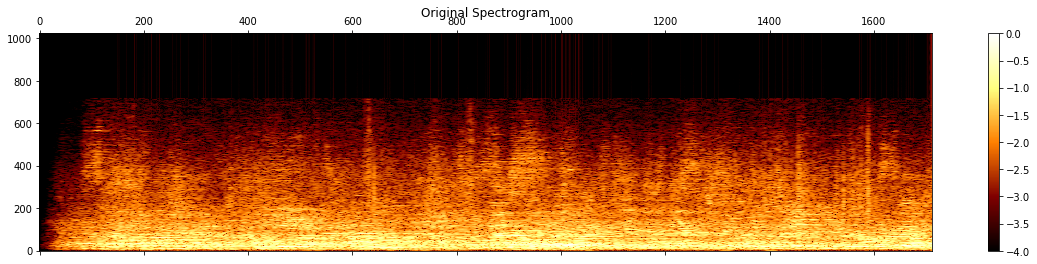

In [6]:
# Plot original spectogram
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(20,4))
cax = ax.matshow(np.transpose(wav_spectrogram), interpolation='nearest', aspect='auto', cmap=plt.cm.afmhot, origin='lower')
fig.colorbar(cax)
plt.title('Original Spectrogram')

In [7]:
# Filter the spectrogram
filter_spectrogram = ac.relativize_spectrogram(s = wav_spectrogram, time_size = 10, freq_size = 50, 
                                               redu = 15.0, pwr = 2.0, std_dev = 200.0)

In [8]:
# Invert from the spectrogram back to a waveform
#recovered_audio_orig = ac.invert_pretty_spectrogram(wav_spectrogram, fft_size = fft_size,
#                                            step_size = step_size, log = True, n_iter = 10)
recovered_audio_orig = ac.invert_pretty_spectrogram(filter_spectrogram, fft_size = fft_size,
                                            step_size = step_size, log = True, n_iter = 10)
IPython.display.Audio(data=recovered_audio_orig, rate=rate) # play the audio

Text(0.5,1.05,'Recovered Spectrogram')

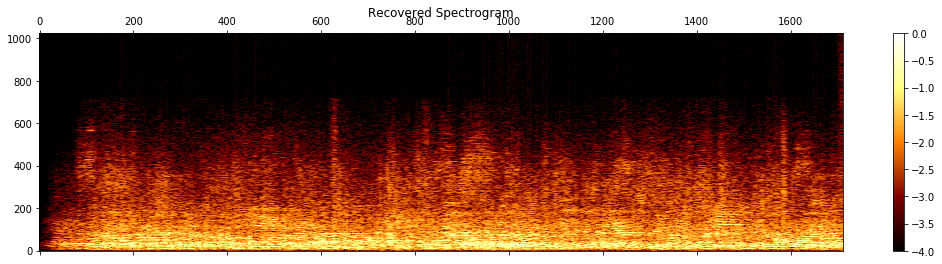

In [9]:
# Make a spectrogram of the inverted audio (for visualization)
inverted_spectrogram = ac.pretty_spectrogram(recovered_audio_orig.astype('float64'), fft_size = fft_size, 
                                   step_size = step_size, log = True, thresh = spec_thresh)
fig, ax = plt.subplots(nrows=1,ncols=1, figsize=(18,4))
cax = ax.matshow(np.transpose(inverted_spectrogram), interpolation='nearest', aspect='auto', cmap=plt.cm.afmhot, origin='lower')
fig.colorbar(cax)
plt.title('Recovered Spectrogram')